In [2]:
# import libraries and define global settings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt

# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [3]:
N = 30
data = np.random.randn(N)
data[data<-1] = data[data<-1]+2
data[data>1.5] = data[data>1.5]**2; # force a few outliers


# pick a lenient threshold just for illustration
zscorethresh = 2
dataZ = (data-np.mean(data)) / np.std(data,ddof=1)


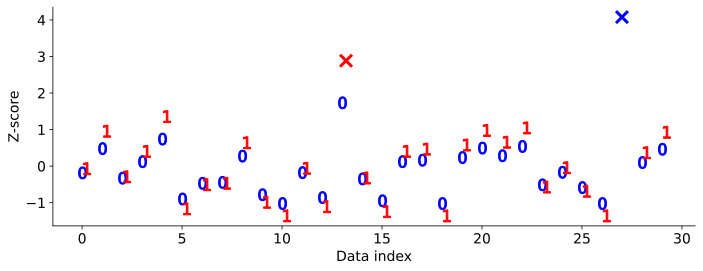

In [4]:
plt.figure(figsize=(10,4))

colorz = 'brkmc'
numiters = 0 # iteration counter
while True:

  # convert to z
  datamean = np.nanmean(dataZ)
  datastd  = np.nanstd(dataZ,ddof=1)
  dataZ = (dataZ-datamean) / datastd

  # find data values to remove
  toremove = dataZ>zscorethresh

  # break out of while loop if no points to remove
  if sum(toremove)==0:
    break
  else:
    # otherwise, mark the outliers in the plot
    plt.plot(np.where(toremove)[0]+numiters/5,dataZ[toremove],'%sx'%colorz[numiters],
             markersize=12,markeredgewidth=3)
    dataZ[toremove] = np.nan

  # replot
  plt.plot(np.arange(N)+numiters/5,dataZ,linestyle='None',marker=f'${numiters}$',markersize=12,
           color=colorz[numiters])

  # update counter
  numiters = numiters + 1

# labels
plt.ylabel('Z-score')
plt.xlabel('Data index')

# display the figure
plt.tight_layout()
plt.show()
     

# Exe 2

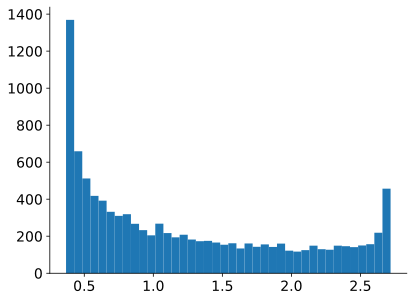

In [13]:
# create data
N = 10000
Y = np.exp(np.sin(np.random.randn(N)))

# make a copy of the data to manipulate
Yc = Y.copy()

# ninspect data
plt.hist(Y,bins=40);
     


In [15]:
# percent to remove (two-tailed)
k = 4

# convert that to a number of data points to remove from each tail
pnts2nan = int( (k/2)/100 * N ) 

# find the data sorting
sort_idx = np.argsort(Y)

# nan the two tails separately
Yc[sort_idx[:pnts2nan]]  = np.nan
Yc[sort_idx[-pnts2nan:]] = np.nan

# confirm the right numbers of points
print(f'Total dataset size: {len(Yc)}')
print(f'Valid dataset size: {np.sum(~np.isnan(Yc))}')

Total dataset size: 10000
Valid dataset size: 9600


In [16]:
# compute the mean and median (also used in the next exercise)
meanY = np.mean(Y)
medianY = np.median(Y)

# print the means
print(f'Mean of original: {meanY:.3f}')
print(f'Mean of trimmed:  {np.nanmean(Yc):.3f}')

# print the medians
print(' ')
print(f'Median of original: {medianY:.3f}')
print(f'Median of trimmed:  {np.nanmedian(Yc):.3f}')

Mean of original: 1.226
Mean of trimmed:  1.212
 
Median of original: 1.010
Median of trimmed:  1.010


# Exe 7.3

In [17]:
# the range of k values
ks = np.arange(1,50,3)

# initialize a results matrix for mean/median
results = np.zeros((len(ks),2))


# experiment
for idx,ki in enumerate(ks):

  # make a new copy of the original data
  Yc = Y.copy() 

  # convert that to a number of data points to remove from each tail
  pnts2nan = int( (ki/2)/100 * N )

  # nan the two tails separately
  Yc[sort_idx[:pnts2nan]]  = np.nan
  Yc[sort_idx[-pnts2nan:]] = np.nan

  # collect mean and median
  results[idx,0] = 100*(np.nanmean(Yc)-meanY) / meanY
  results[idx,1] = 100*(np.nanmedian(Yc)-medianY) / medianY

  print(f'Total/valid dataset size: {len(Yc)} -> {np.sum(~np.isnan(Yc))}')

Total/valid dataset size: 10000 -> 9900
Total/valid dataset size: 10000 -> 9600
Total/valid dataset size: 10000 -> 9300
Total/valid dataset size: 10000 -> 9000
Total/valid dataset size: 10000 -> 8700
Total/valid dataset size: 10000 -> 8400
Total/valid dataset size: 10000 -> 8100
Total/valid dataset size: 10000 -> 7800
Total/valid dataset size: 10000 -> 7500
Total/valid dataset size: 10000 -> 7200
Total/valid dataset size: 10000 -> 6900
Total/valid dataset size: 10000 -> 6600
Total/valid dataset size: 10000 -> 6300
Total/valid dataset size: 10000 -> 6000
Total/valid dataset size: 10000 -> 5700
Total/valid dataset size: 10000 -> 5400
Total/valid dataset size: 10000 -> 5100


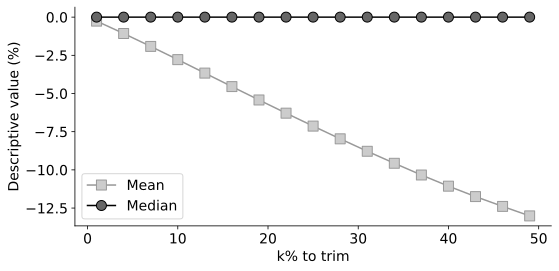

In [18]:
# plot 

plt.figure(figsize=(8,4))
plt.plot(ks,results[:,0],'s-',color=[.6,.6,.6],markerfacecolor=[.8,.8,.8],markersize=10,label='Mean')
plt.plot(ks,results[:,1],'o-',color='k',markerfacecolor=[.4,.4,.4],markersize=10,label='Median')
plt.legend()
plt.xlabel('k% to trim')
plt.ylabel(r'Descriptive value (%)')

# display the figure
plt.tight_layout()
plt.show()

# Exe 5

In [9]:
# outlier threshold
zThreshold = 3.29

# some raw data
N = 135
data = np.exp(np.random.randn(N)/2) + 5

# zscore 
dataZ = (data-np.mean(data)) / np.std(data,ddof=1)

# identify data indices containing outliers
outliers = np.where(np.abs(dataZ)>zThreshold)[0]

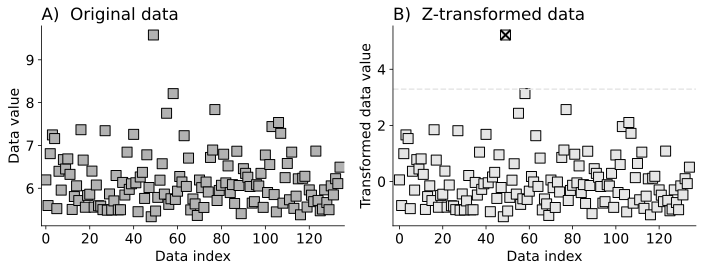

In [10]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))


axs[0].plot(data,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
axs[0].set(xlim=[-2,N+1],xlabel='Data index',ylabel='Data value')
axs[0].set_title(r'A)  Original data')


axs[1].plot(dataZ,'ks',markersize=10,markerfacecolor=(.9,.9,.9))
axs[1].axhline(zThreshold,linestyle='--',color=(.9,.9,.9))
axs[1].plot(outliers,dataZ[outliers],'kx',markersize=10,markeredgewidth=2)
axs[1].set(xlim=[-3,N+2],xlabel='Data index',ylabel='Transformed data value')
axs[1].set_title(r'B)  Z-transformed data')

# display the figure
plt.tight_layout()
plt.show()

# Exe 6

In [11]:
# raw data
N = 10 # sample size
data = np.exp(np.random.randn(N)/2) + 5
data[-1] = np.max(data)+2 # impose an outlier 
xvals = np.arange(N)

dataZ1 = (data-np.mean(data)) / np.std(data,ddof=1)
dataZ2 = (data[:-1]-np.mean(data[:-1])) / np.std(data[:-1],ddof=1)



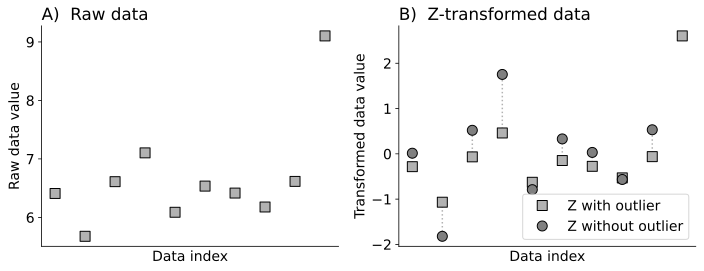

In [12]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))


axs[0].plot(xvals,data,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
axs[0].set(xticks=[],xlabel='Data index',ylabel='Raw data value')
axs[0].set_title(r'A)  Raw data')

axs[1].plot(xvals,dataZ1,'ks',markersize=10,markerfacecolor=(.7,.7,.7),label='Z with outlier')
axs[1].plot(xvals[:-1],dataZ2,'ko',markersize=10,markerfacecolor=(.5,.5,.5),label='Z without outlier')
axs[1].set(xticks=[],xlabel='Data index',ylabel='Transformed data value')
axs[1].legend()
axs[1].set_title(r'B)  Z-transformed data')

# draw lines connection pre/post-removal values
for d,z,x in zip(dataZ1[:-1],dataZ2,xvals[:-1]):
  axs[1].plot([x,x],[d,z],':',color=(.7,.7,.7),zorder=-10)

# display the figure
plt.tight_layout()
plt.show()